Sort Algorithms

A program (2 functions) that works exactly like the sorted() built-in function in python. Follow the following:

    1. Function has 3 input parameters: iterable of objects, key, and reversed.
    2. List can be numeric, string, or comparable user defined objects
    3. The function returns a new sorted list
    4. The function also returns:
    a. Number of comparisons
    b. Number of swaps
    c. Timer measure
    5. Implement both bubble and merge sort.
    6. Compare your functions on a randomly generated data
    7. Compare your functions to the built-in sorted() function (time wise)
    8. Present your findings thru plots and summary tables

In [55]:
## Functions to bubble sort and merge sort 

#import libraries
import timeit
import numpy as np
import matplotlib.pyplot as plt
import pandas

#define bubble sort function
def bubble_sort(sort_list,key = None,reverse = False):
    exit_loop=1
    
# handling various input data types
    if type(sort_list) == dict:
        x = list(input_list.keys())
        y = list(input_list.values())
        sort_list = [[x[i],y[i]] for i in range(len(x))] 
        
# modifying data based on the key
    if key == None or key == 0:
        new_sort_list = sort_list[:len(sort_list)]
    elif type(key) == int:
        new_sort_list = [[sort_list[i][key],i] for i in range(len(sort_list))]
    else:
        new_sort_list = [[key(sort_list[i]),i] for i in range(len(sort_list))]
        
# bubble sorting the list
    number_of_comparisons = 0
    number_of_swaps = 0
    while exit_loop > 0:
        exit_loop = 0
        for i in range(len(new_sort_list)-1):
            number_of_comparisons = number_of_comparisons+1
            if new_sort_list[i] > new_sort_list[i+1]:
                temp = new_sort_list[i] 
                new_sort_list[i] = new_sort_list[i+1]
                new_sort_list[i+1] = temp
                exit_loop = exit_loop + 1
                number_of_swaps = number_of_swaps + 1
                
# reverse the string if reverse = True
    if reverse == True:
        new_sort_list.reverse()        
        
# modifying the bubble sort result to be printed based on the key
    if key == None or key == 0:
        bubble_sorted_list = new_sort_list[:len(new_sort_list)]
    elif type(key) == int:
        order_list = [new_sort_list[i][1] for i in range(len(new_sort_list))]
        bubble_sorted_list = [sort_list[order_list[i]] for i in range(len(order_list))]
    else:
        order_list = [new_sort_list[i][1] for i in range(len(new_sort_list))]
        bubble_sorted_list = [sort_list[order_list[i]] for i in range(len(order_list))]
        
# print bubble sort results    
    print("\tBubble sorted list:", bubble_sorted_list)
    print("\tNumber of comparisons:",number_of_comparisons)
    print("\tNumber of swaps:",number_of_swaps)

#define merge sort funtion
def merge_sort(sort_list,number_of_comparisons = [],key=None,reverse = False):
    
# handling various input data types
    if type(sort_list) == dict:
        x = list(input_list.keys())
        y = list(input_list.values())
        sort_list = [[x[i],y[i]] for i in range(len(x))] 
        
# modifying data based on the key
    if key == None or key == 0:
        new_sort_list = sort_list[:len(sort_list)]
    elif type(key) == int:
        new_sort_list = [[sort_list[i][key],i] for i in range(len(sort_list))]
    else:
        new_sort_list = [[key(sort_list[i]),i] for i in range(len(sort_list))]
        
# recursive funtion to merge sort
    def merge_sort_recursive(new_sort_list):
        if len(new_sort_list)>1:
            mid = len(new_sort_list)//2
            first_half = new_sort_list[:mid]
            last_half = new_sort_list[mid:]

            merge_sort_recursive(first_half)
            merge_sort_recursive(last_half)

            i=0
            j=0
            k=0

            while i < len(first_half) and j < len(last_half):
                if first_half[i] < last_half[j]:
                    new_sort_list[k]=first_half[i]
                    i=i+1
                    number_of_comparisons.append(1)
                else:
                    new_sort_list[k]=last_half[j]
                    j=j+1
                    number_of_comparisons.append(1)
                k=k+1

            while i < len(first_half):
                new_sort_list[k]=first_half[i]
                i=i+1
                k=k+1
                number_of_comparisons.append(1)

            while j < len(last_half):
                new_sort_list[k]=last_half[j]
                j=j+1
                k=k+1
                number_of_comparisons.append(1)                 
        return new_sort_list,number_of_comparisons
    
    merged_list_with_comparsion = merge_sort_recursive(new_sort_list)
    merged_list = merged_list_with_comparsion[0]
    
# reverse the string if reverse = True
    if reverse == True:
        merged_list.reverse()        
        
# modifying the merge sort result to be printed based on the key
    if key == None or key == 0:
        merge_sorted_list = merged_list[:len(merged_list)]
    elif type(key) == int:
        order_list = [merged_list[i][1] for i in range(len(merged_list))]
        merge_sorted_list = [sort_list[order_list[i]] for i in range(len(order_list))]
    else:
        order_list = [merged_list[i][1] for i in range(len(merged_list))]
        merge_sorted_list = [sort_list[order_list[i]] for i in range(len(order_list))]
        
# print merge sort results    
    print("\tMerge sorted list:", merge_sorted_list)
    print("\tNumber of comparisons:",sum(merged_list_with_comparsion[1]))

#define funtion to compare bubble, merge and sorted functions
def compare_sorts(input_list,key=None,reverse = False):
    print("List to be sorted:",input_list)
    
# call bubble sort
    print("\nBubble sort:")
    bubble_sort_time = timeit.timeit(lambda n= input_list: bubble_sort(n,key=key,reverse = reverse),number = 1)
    
# call merge sort    
    print("Merge sort:")
    merge_sort_time = timeit.timeit(lambda n= input_list: merge_sort(n,key=key,reverse = reverse),number = 1)
    
# call sorted funtion
    print("Sorted function:")
    if key == 0 : key = None
    sorted_function_list = sorted(input_list,key = key,reverse=reverse)
    sorted_function_time = timeit.timeit(lambda n= input_list: sorted(n,key = key,reverse=reverse),number = 1)
    print("\tSorted function output list:", sorted_function_list)
    print("\tSorted function time:",sorted_function_time)
    
# Plot run time of the diffent sorted fruntions
# Plot - define x and y axis and input data
    sortTypes = ('Bubble', 'Merge', 'Sorted')
    y_lab = np.arange(len(sortTypes))
    time = [bubble_sort_time, merge_sort_time, sorted_function_time]
    
# Plot labels & title
    plt.bar(y_lab, time, align='center', alpha=0.5)
    plt.xticks(y_lab, sortTypes)
    plt.ylabel('Type of Sort')
    plt.title('Sort Type vs Run Time')
    plt.show()
    
# Summary table
    df = {'Function Name': sortTypes, 'Speed to Execute':time}
    df = pandas.DataFrame(data = df)
    print(df[0:3])


List to be sorted: [90, 'a', 'z', 'c']

Bubble sort:
	Bubble sorted list: ['a', 'c', 90, 'z']
	Number of comparisons: 9
	Number of swaps: 3
Merge sort:
	Merge sorted list: ['a', 'c', 90, 'z']
	Number of comparisons: 70
Sorted function:
	Sorted function output list: ['a', 'c', 90, 'z']
	Sorted function time: 9.252999007003382e-06


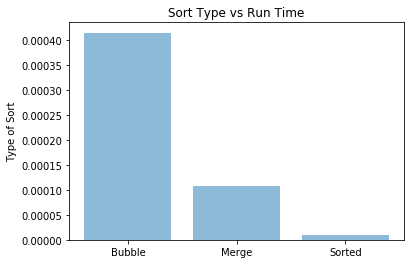

  Function Name  Speed to Execute
0        Bubble          0.000415
1         Merge          0.000108
2        Sorted          0.000009


In [60]:
# Call compare_sorts() function to compare time difference between user-defined bubble, merge and built-in sorted funtions
# Alternatively you can use bubble_sort() or merge_sort() function to sort and print results accordingly
# Below is a list of input lists that were tested for the funtion

#input_list = []
#input_list = [13,3,15,1,8,10,9,7,2,6]
#input_list = ['a','z','r','d','c','f','i','h']
#input_list = ['13','z','15','d','8','f','7','2']
#input_list = [(1,0,1,0),(1,0,0,0),(0,1,0,1),(1,1,1,0)]
#input_list = [('john', 'A', 15),('jane', 'B', 8),('dave', 'B', 11)]
#input_list = [13,3,15,1,8,10,9,7,2,6] #add your own input list here
#input_list = [1,2,3,4,5,6,7,8]
#input_list = [3,4,5,6,7,8]
#input_list = [2]
#input_list = [10,9,8,7,6,5,4,3,2,1]
#input_list = [5,4,3,2,1]
#input_list = ['a','b','c','d','e']
#input_list = ['a','b']
#input_list = ['e','d','c','b','a']
#key=lambda x:sum([ord(item) for item in str(x)])
#key = len
#reverse = TRUE
#key = 0 (or 1 or 2...) to order tuples of dictionalry based on the element number 
input_list=[90,'a','z','c']

compare_sorts(input_list,key = lambda x:sum([ord(item) for item in str(x)]),reverse = False) 
                                                     